In [1]:
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv(r"C:\users\dhruv\OneDrive\Desktop\udemy_courses.csv", parse_dates=['published_timestamp'])

In [9]:
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

# Display top 5 rows

In [12]:
data.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


# Display last 3 rows

In [15]:
data.tail(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


# Find the shape of the dataset

In [18]:
data.shape

(3678, 12)

In [20]:
print("number of rows", data.shape[0])
print("number of columns", data.shape[1])

number of rows 3678
number of columns 12


# Getting info about our dataset

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

# check the null values of the dataset

In [42]:
data.isnull().values.any()

False

In [46]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

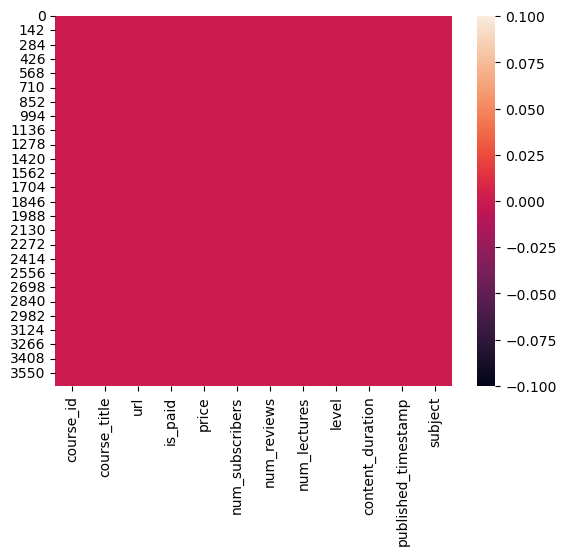

In [50]:
sns.heatmap(data.isnull())

# check for duplicate data and drop them

In [55]:
dup = data.duplicated().any()
print(dup)

True


In [57]:
data=data.drop_duplicates()

In [61]:
dup = data.duplicated().any()
print(dup)

False


# Find out the number of courses per subject

In [64]:
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [68]:
data['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

In [72]:
import matplotlib.pyplot as plt

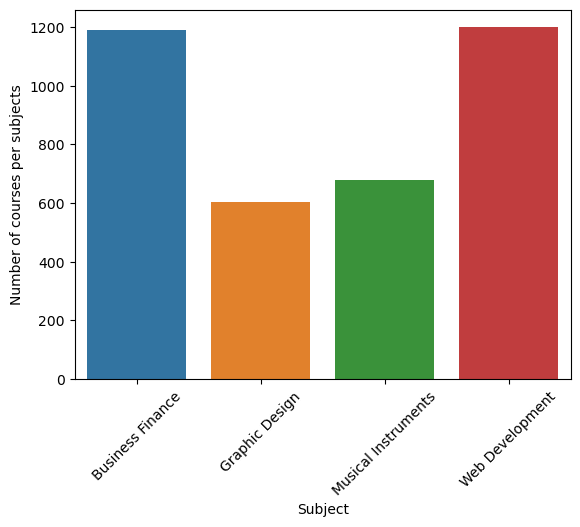

In [84]:
sns.countplot(x='subject',data=data)
plt.xlabel("Subject")
plt.ylabel("Number of courses per subjects")
plt.xticks(rotation =45)
plt.show()

# For which levels, udemy providing the courses

In [87]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [89]:
data['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

<Axes: xlabel='level', ylabel='count'>

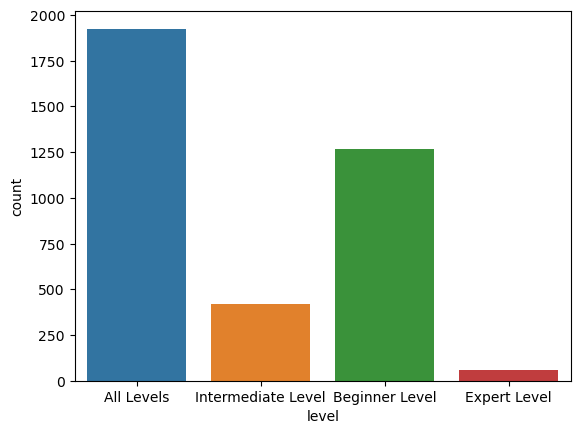

In [91]:
sns.countplot(x ='level', data=data)

# Display the count of paid and free courses

In [94]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [98]:
data['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

<Axes: xlabel='is_paid', ylabel='count'>

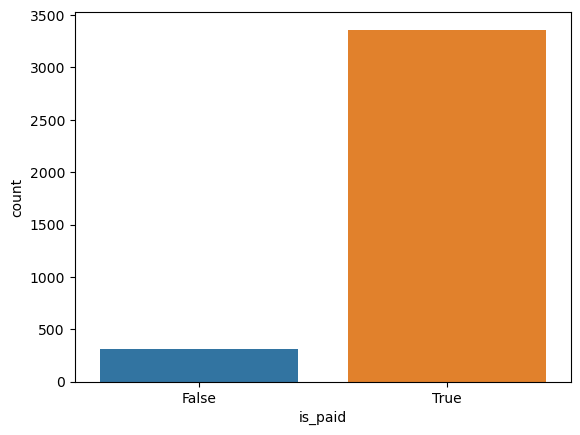

In [100]:
sns.countplot(x='is_paid',data=data)

# Which course has more lectures(Free or paid)?

In [103]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [125]:
data.groupby(['is_paid'])

# Which courses have a higher number of subscribers free or paid?

In [128]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

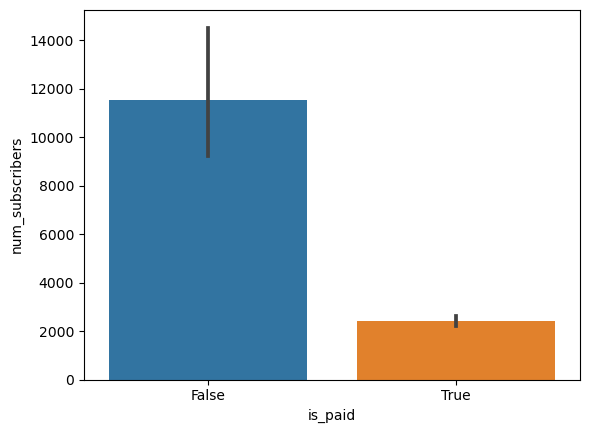

In [130]:
sns.barplot(x='is_paid', y='num_subscribers', data=data)

# Which level has the higghest number of suscribers

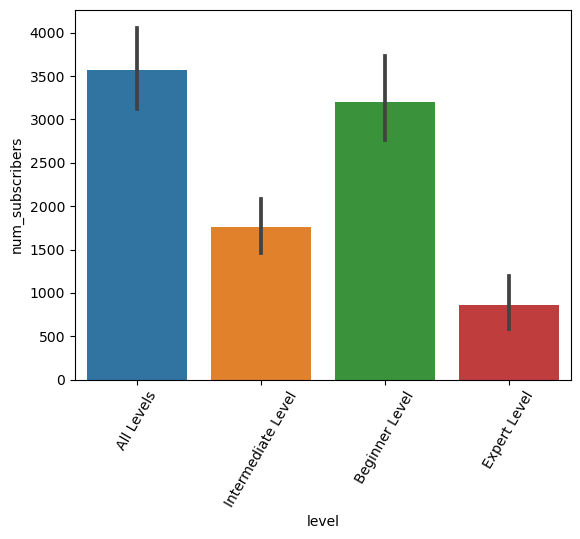

In [137]:
sns.barplot(x='level', y='num_subscribers', data=data)
plt.xticks(rotation =60)
plt.show()

# Find Most popular course titles

In [140]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [146]:
data[data['num_subscribers'].max()==data['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# Display 10 most popular courses as per number of subscribers  

In [149]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [155]:
top_10=data.sort_values(by='num_subscribers', ascending =False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

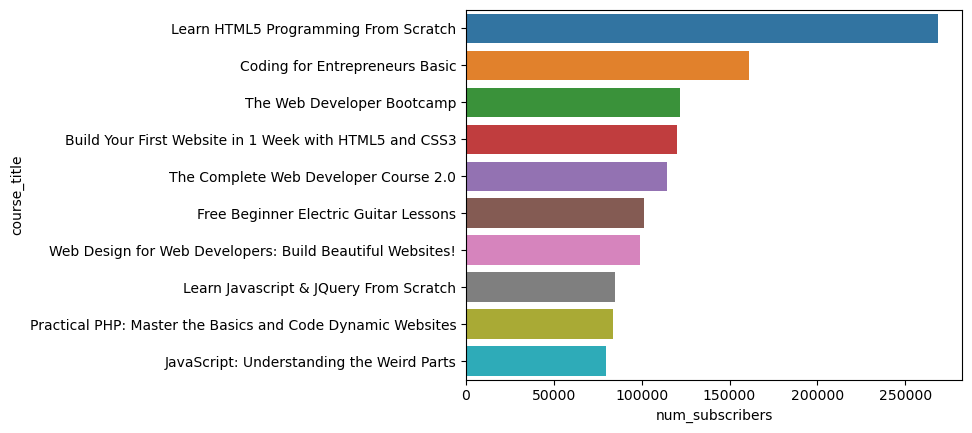

In [161]:
sns.barplot(x= 'num_subscribers', y='course_title', data=top_10)

# Find the course which is having the highest number of reviews

In [164]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<Axes: xlabel='subject', ylabel='num_reviews'>

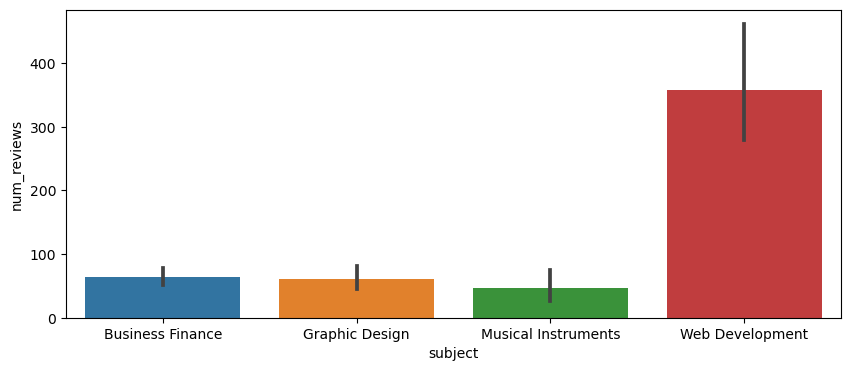

In [168]:
plt.figure(figsize=(10,4))
sns.barplot(x='subject', y='num_reviews', data=data)

# Does price effect number of reviews 

In [171]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<Axes: xlabel='price', ylabel='num_reviews'>

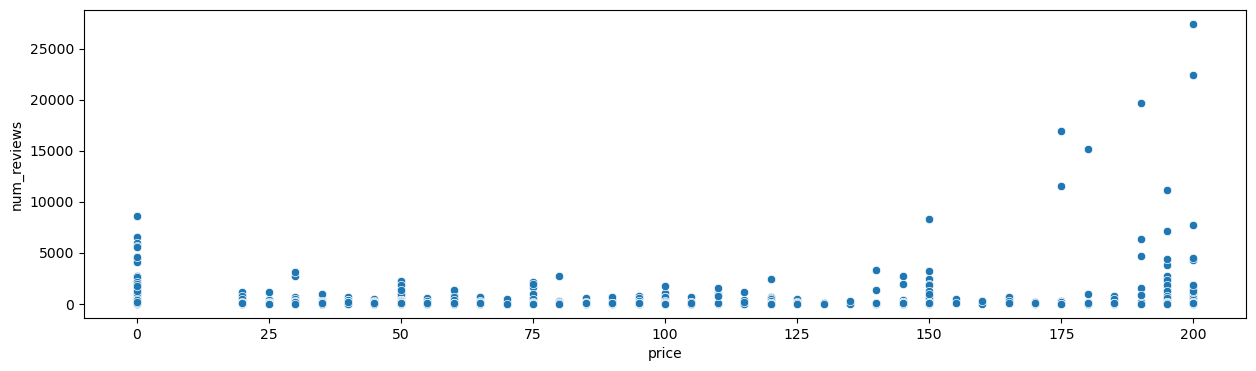

In [177]:
plt.figure(figsize=[15,4])
sns.scatterplot(x='price',y='num_reviews', data=data)

# Find the courses related to python

In [180]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [188]:
len(data[data['course_title'].str.contains('python',case =False)])

29

# Display 10 most popular python courses as per number of subscribers

In [191]:
data[data['course_title'].str.contains('python',case =False)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28 16:41:44+00:00,Business Finance
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28 23:41:03+00:00,Business Finance
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14 00:39:45+00:00,Business Finance
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12 00:40:03+00:00,Business Finance
536,529828,Python for Trading & Investing,https://www.udemy.com/python-for-trading-inves...,True,95,638,25,36,All Levels,5.0,2015-06-17 22:23:31+00:00,Business Finance
762,1088656,Quantitative Trading Analysis with Python,https://www.udemy.com/quantitative-trading-ana...,True,50,256,17,49,All Levels,5.5,2017-01-27 17:11:28+00:00,Business Finance
863,902888,Investment Portfolio Analysis with Python,https://www.udemy.com/investment-portfolio-ana...,True,50,209,13,37,All Levels,7.0,2016-07-13 21:40:32+00:00,Business Finance
1682,546848,Learn to code in Python and learn Adobe Photos...,https://www.udemy.com/learn-to-code-in-python-...,True,50,1132,1,29,All Levels,2.0,2015-07-08 00:15:12+00:00,Graphic Design
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development


In [193]:
data[data['course_title'].str.contains('python',case =False)].sort_values(by='num_subscribers',ascending =False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08 20:57:35+00:00,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04 07:12:21+00:00,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14 18:18:57+00:00,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06 19:00:38+00:00,Web Development


# In which year the highest number of courses were posted

In [196]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [200]:
data['Year']=data['published_timestamp'].dt.year

C:\Users\dhruv\AppData\Local\Temp\ipykernel_5180\950198484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year']=data['published_timestamp'].dt.year


In [204]:
data['Year'].head(10)

0    2017
1    2017
2    2016
3    2017
4    2016
5    2014
6    2016
7    2015
8    2015
9    2017
Name: Year, dtype: int32

<Axes: xlabel='Year', ylabel='count'>

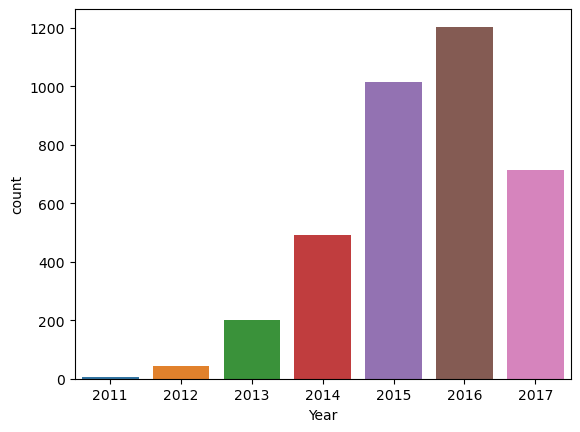

In [208]:
sns.countplot(x='Year', data=data)

# Display Category -wise count of posted subjects[Year Wise]

In [213]:
data.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Musical Instruments     10
      Graphic Design          10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Web Development        223
      Business Finance       223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64